In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee_data = pd.read_excel("TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx")

In [3]:
employee_left = pd.read_excel("TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx",sheet_name ='Employees who have left')
employee_notleft = pd.read_excel("TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx",sheet_name = 'Existing employees')

In [4]:
employee_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
employee_notleft.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [6]:
employee_notleft.shape

(11428, 10)

In [7]:
employee_left.shape

(3571, 10)

In [8]:
employee_left['dept'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

In [9]:
#np.where(condition[,x,y]) On basis of the condition given the values of x and y are returned from the original array
#if x and y are not given in where then we boolean output on basis of the condition 
#np.where concept : https://youtu.be/iAOL2K9yR1g

#Combine "technical","support" and "IT" into one department
employee_left['dept']=np.where(employee_left['dept'] =='support', 'technical', employee_left['dept'])
employee_left['dept']=np.where(employee_left['dept'] =='IT', 'technical', employee_left['dept'])
#If dept = support, then it gets added to technical else the dept is added to depatrment colmn
#similarly for IT


In [10]:
employee_notleft['dept']=np.where(employee_notleft['dept'] =='support', 'technical', employee_notleft['dept'])
employee_notleft['dept']=np.where(employee_notleft['dept'] =='IT', 'technical', employee_notleft['dept'])

In [11]:
employee_left['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
employee_left.mean()

Emp ID                   6500.439653
satisfaction_level          0.440098
last_evaluation             0.718113
number_project              3.855503
average_montly_hours      207.419210
time_spend_company          3.876505
Work_accident               0.047326
promotion_last_5years       0.005321
dtype: float64

In [13]:
employee_notleft.mean()

Emp ID                   7812.340742
satisfaction_level          0.666810
last_evaluation             0.715473
number_project              3.786664
average_montly_hours      199.060203
time_spend_company          3.380032
Work_accident               0.175009
promotion_last_5years       0.026251
dtype: float64

In [14]:
#Not left avg monthly hours less than those who left
#Not left promotions higher over 5 years than left
#Not left no of projects less than left
#Not left higher satisfaction than left(obvious)

In [15]:
employee_left.groupby('dept').mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
dept,,,,,,,,
RandD,4897.181818,0.432810,0.745372,4.024793,210.975207,4.000000,0.082645,0.000000
accounting,6749.436275,0.402598,0.694510,3.872549,207.029412,3.794118,0.044118,0.000000
hr,6917.465116,0.433395,0.679721,3.539535,197.306977,3.753488,0.032558,0.000000
management,6364.626374,0.422857,0.727253,4.142857,207.263736,3.758242,0.054945,0.032967
marketing,6591.965517,0.453153,0.692020,3.581281,200.990148,3.857143,0.049261,0.000000
product_mng,6498.267677,0.481566,0.726566,3.848485,207.787879,3.989899,0.045455,0.000000
sales,6619.987179,0.447663,0.711243,3.736686,205.041420,3.812623,0.045365,0.006903
technical,6452.260328,0.435515,0.730918,3.983607,211.013115,3.932459,0.047869,0.005902


In [16]:
employee_notleft.groupby('dept').mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
dept,,,,,,,,
RandD,7120.120120,0.653799,0.706081,3.822823,198.951952,3.252252,0.186186,0.040541
accounting,7439.598579,0.647211,0.726128,3.808171,199.037300,3.424512,0.154529,0.024867
hr,7085.889313,0.666679,0.720802,3.702290,199.250000,3.192748,0.156489,0.028626
management,9958.474954,0.654861,0.723451,3.812616,200.233766,4.395176,0.181818,0.122449
marketing,8111.108397,0.669878,0.723282,3.720611,198.888550,3.480916,0.195420,0.065649
product_mng,8545.897727,0.658466,0.711435,3.795455,197.765625,3.330966,0.174716,0.000000
sales,8019.702175,0.668548,0.709223,3.789187,199.571657,3.443698,0.173065,0.029750
technical,7497.233928,0.672107,0.717717,3.791658,198.797463,3.246829,0.175661,0.009030


In [17]:
employee_left['salary'].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [18]:
employee_notleft['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [19]:
employee_notleft.shape

(11428, 10)

In [20]:
employee_notleft['salary'].value_counts()/11428

low       0.450123
medium    0.448810
high      0.101068
Name: salary, dtype: float64

In [21]:
employee_left.shape

(3571, 10)

In [22]:
employee_left['salary'].value_counts()/3571

low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64

In [23]:
#left higher low salary and high salary ratio comapred to not left

Text(0, 0.5, 'Frequency')

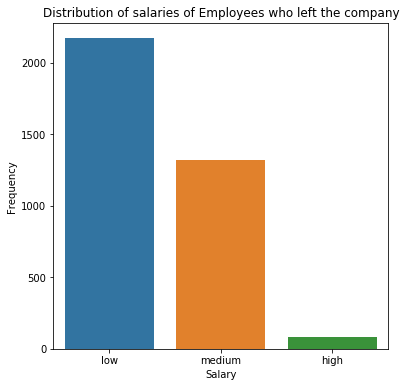

In [24]:
#Salary plot for those who left company
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
plt.figure(figsize=(6,6))
sns.countplot(employee_left['salary'])
plt.title('Distribution of salaries of Employees who left the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

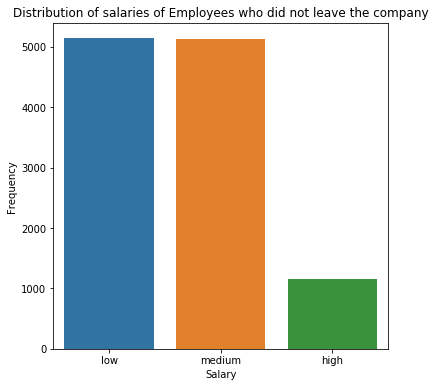

In [25]:
#Salary plot for those who did not leave comapny
plt.figure(figsize=(6,6))
sns.countplot(employee_notleft['salary'])
plt.title('Distribution of salaries of Employees who did not leave the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Departments of Employees who left the Company')

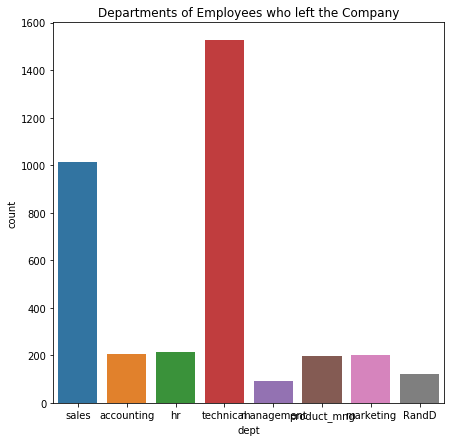

In [26]:
#Department wise represenatation for employees who left the company
plt.figure(figsize=(7,7))
sns.countplot(employee_left['dept'])
plt.title('Departments of Employees who left the Company')

Text(0.5, 1.0, 'Departments of Employees who didnt leave ')

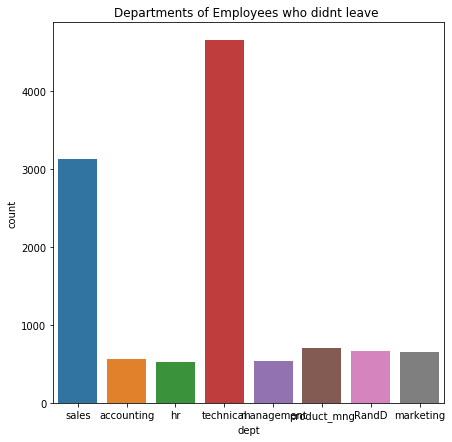

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(employee_notleft['dept'])
plt.title('Departments of Employees who didnt leave ')

Text(0, 0.5, 'Satisfaction Level')

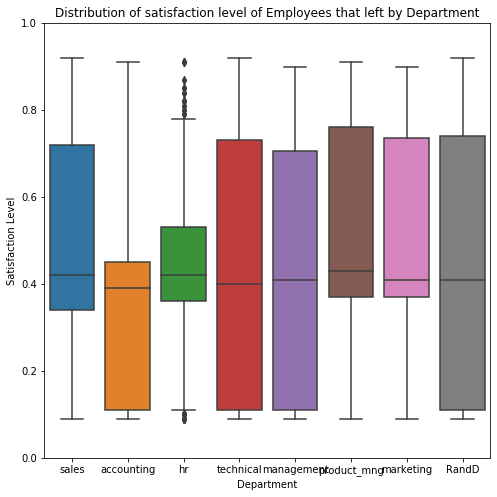

In [28]:
#Distribution of Satisfaction using box and whisker plot for those who left
plt.figure(figsize=(8,8))
sns.boxplot(x='dept', y='satisfaction_level', data=employee_left)
plt.ylim([0,1])
#Sets the limits of the Y axis 
plt.title('Distribution of satisfaction level of Employees that left by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Satisfaction Level')

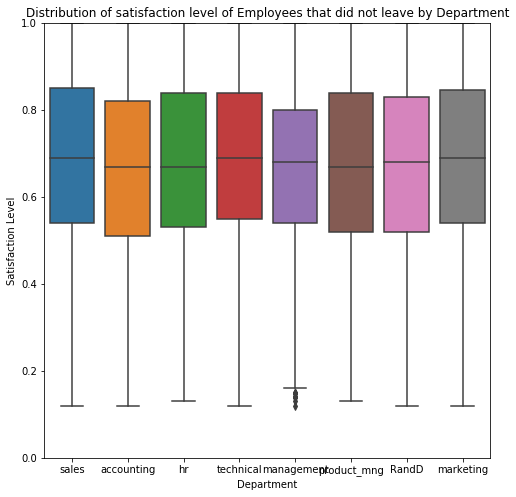

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(x='dept', y='satisfaction_level', data=employee_notleft)
plt.ylim([0,1])
#Sets the limits of the Y axis 
plt.title('Distribution of satisfaction level of Employees that did not leave by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Frequency')

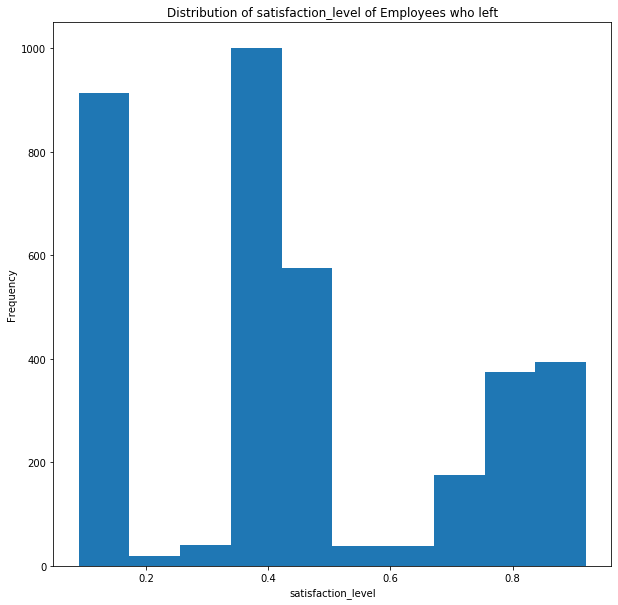

In [30]:
plt.figure(figsize=(10,10))
plt.hist(employee_left['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')

In [31]:
#Now we will divide satisfaction into 3 grps low high medium using pd.cut
#Pandas cut() function is used to separate the array elements into different bins
employee_left['satisfaction_level_new'] = pd.cut(employee_left['satisfaction_level'], 
       3, labels=["small", "medium", "high"])
#here we put 3 to divide data into 3 bins

Text(0, 0.5, 'Frequency')

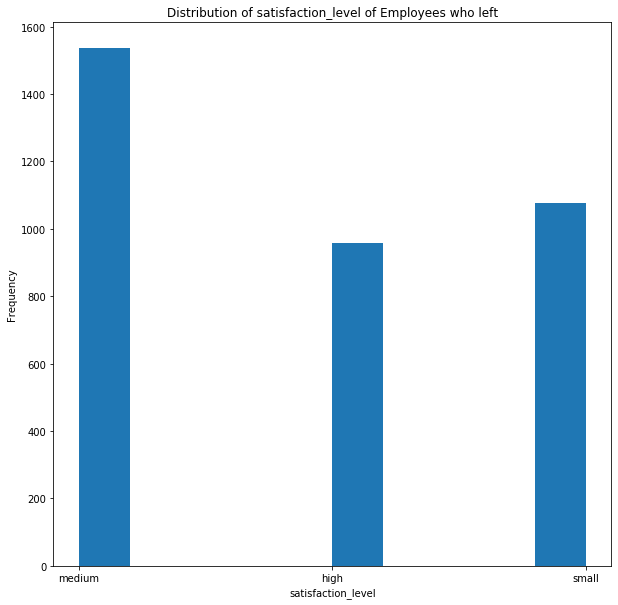

In [32]:
plt.figure(figsize=(10,10))
plt.hist(employee_left['satisfaction_level_new'])
plt.title('Distribution of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')

In [33]:
employee_notleft['satisfaction_level_new_not'] = pd.cut(employee_notleft['satisfaction_level'], 
       3, labels=["small", "medium", "high"])

Text(0, 0.5, 'Frequency')

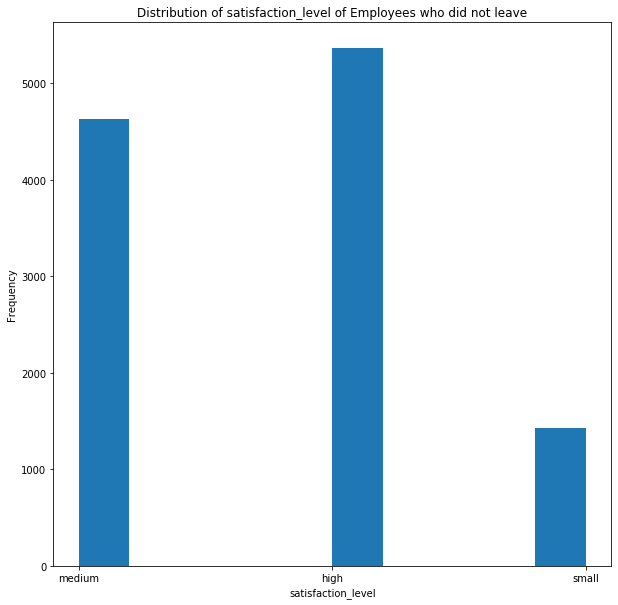

In [34]:
plt.figure(figsize=(10,10))
plt.hist(employee_notleft['satisfaction_level_new_not'])
plt.title('Distribution of satisfaction_level of Employees who did not leave')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')

In [35]:
#Satisfaction of employees who left the comapny is approx below average - from plots

In [36]:
import statistics

In [37]:
statistics.mean(employee_left['satisfaction_level'])*100

44.00980117614114

In [38]:
statistics.mean(employee_notleft['satisfaction_level'])*100

66.6809590479524